# Solved Various Problem Sets

In [1]:
from IPython.display import display, Markdown

from sympy import *
from sympy.interactive.printing import init_printing
from sympy.abc import s, K, k, t

from mathprint import *

## Problem 1

**Topics: block diagram, second-order system**

![](./images/p7.png)

Determine the values of $K$ and $k$ such that the system has a damping ratio $\zeta$ of 0.7 and an undamped natural frequency $\omega_n$ of $4 \mathrm{rad} / \mathrm{sec}$.

### Solution

First, simplify the blockdiagram:

In [2]:
G = K / (s+2)
S1 = (G / (1+G*k)) * (1/s) # negative feedback and serial connection
S2 = S1 / (1+S1) # another negative feedback
S2 = collect(expand(simplify(S2)), [s**2, s]) # make it nice

mprint("\\frac{C(s)}{R(s)}=", latex(S2))

<IPython.core.display.Math object>

Next, the coeficient of $s$ is $2 \zeta \omega_n$ and $K=\omega_n^2$.

In [3]:
zeta = 0.7
omegan = 4

# Take the denom, find the coefficient of s,
# set it equals to 2 * zeta 8 omega_n
eq = Eq(denom(S2).coeff(s), 2*zeta*omegan)
display(eq)

# Set K = omega_n^2
eq = eq.subs(K, omegan**2)
display(eq)

Eq(K*k + 2, 5.6)

Eq(16*k + 2, 5.6)

Solve for $k$:

In [4]:
k_ = solveset(eq, k)
mprint("k=", latex(k_))

<IPython.core.display.Math object>

So, the final answer is $k=0.225$.

## Problem 2

**Topics: block diagram, second-order system**

![](./images/p8.png)

Determine the value of $k$ such that the damping ratio $\zeta$ is 0.5 . Then obtain the rise time $t_r$, peak time $t_p$, maximum overshoot $M_p$, and settling time $t_s$ in the unit-step response.

### Solution

First, simplify the blockdiagram:

In [5]:
G = 16 / (s+0.8) 

S1 = (G / (1+G*k)) * (1/s) # negative feedback and serial connection
S2 = S1 / (1+S1) # another negative feedback
S2 = collect(expand(simplify(S2)), [s**2, s]) # make it nice

mprint("\\frac{C(s)}{R(s)}=", latex(S2))

<IPython.core.display.Math object>

Finding $k$ for $\zeta = 0,5$ and $\omega_n = 4$. Note that the coeficient of $s$ is $2 \zeta \omega_n$.

In [6]:
zeta = 0.5
omegan = 4 #sqrt(16)

# Take the demom, find the coefficient of s,
# set it equals to 2 * zeta 8 omega_n
eq = Eq(denom(S2).coeff(s), 2*zeta*omegan)

kval = solve(eq, k)

mprint("k=", latex(kval[0]))

<IPython.core.display.Math object>

Thus, $k=0.2$.

Finally, conclude the system, convert it to a transfer function. 

**To push things a bit further, we will apply inverse Laplace to bring the response back to time-domain and allow us to plot the result.** 

Please note that SymPy does have a generic function for plotting a step response out of an s-domanin transfer function. However, we are not going to use it here.

In [7]:
G = S2.subs(k, 0.2)
mprint("G(s)=", latex(G))

<IPython.core.display.Math object>

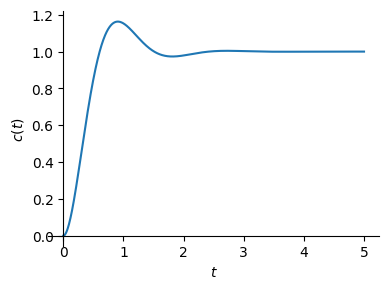

In [8]:
from sympy.plotting import plot

C = 1/s * G
c = inverse_laplace_transform(C, s, t)

plot(c, (t, 0, 5), size=(4, 3), ylabel="$c(t)$", show=True);

In [9]:
# Rise time
tr = 2*atan(sqrt(zeta+1) / sqrt(1-zeta)) / (omegan * sqrt(1-zeta**2))                     

# Peak time
tp = pi / (omegan * sqrt(1 - zeta**2))

# Maximum overshoot
Mp = exp(-pi * zeta / sqrt(1 - zeta**2))   

# 2-percent settling time
ts = (3.912023 - 0.5 * log(1 - zeta**2)) / (omegan * zeta) 

print('rise time =', tr.evalf())
print('peak time =', tp.evalf())
print('maximum overshoot =', Mp.evalf())
print('2-percent-settling time =', ts)

rise time = 0.604599788078073
peak time = 0.906899682117109
maximum overshoot = 0.163033534821580
2-percent-settling time = 2.02793201811295


### Comparison to the Python Control Library
The results are slightly different from the Python Control Library. This is beacase Python Control Library does the calculations numerically.

In [10]:
import control as ct

s = ct.TransferFunction.s
tf = ct.TransferFunction(16 / (s**2+4*s+16))
ct.step_info(tf, RiseTimeLimits=(0, 1))

{'RiseTime': np.float64(0.6279777526347396),
 'SettlingTime': np.float64(2.023483869600828),
 'SettlingMin': np.float64(0.9734200938528016),
 'SettlingMax': np.float64(1.1630334929041963),
 'Overshoot': np.float64(16.303349290419632),
 'Undershoot': 0,
 'Peak': np.float64(1.1630334929041963),
 'PeakTime': np.float64(0.9070789760279573),
 'SteadyStateValue': np.float64(1.0)}